In [1]:
import os 
import sys

# add parent dir to import path 
parent_dir = os.path.abspath('..')
sys.path.append(parent_dir)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# points genaration & view
house = np.array([[0, 1, 1, 0, 0, 1, 1, 0, 0, 1 ],
                  [0, 0, 1, 1, 0, 0, 1, 1, 0.5, 0.5],
                  [0, 0, 0, 0, 0.5, 0.5, 0.5, 0.5, 1, 1]])

In [4]:
house2 = np.array([[0, 0, 0], # back 
                   [0, 8, 0],
                   [0, 8, 8],                   
                   [0, 4, 10],
                   [0, 0, 8], 
                   [4, 0, 0], # front
                   [4, 8, 0],
                   [4, 8, 8],
                   [4, 4, 10],
                   [4, 0, 8],

                   [4, 1, 1],
                   [4, 1, 5],
                   [4, 3, 5],
                   [4, 3, 1],

                   [4, 5, 1],
                   [4, 5, 5],
                   [4, 7, 5],
                   [4, 7, 1],
                   ])

In [5]:
pattern = np.array([[0, 0, 0, 1],
                    [0, 1, 0, 1],
                    [0, 2, 0, 1],
                    [0, 0, 1, 1],
                    [0, 1, 1, 5],                    
                    [0, 2, 1, 5],
                    [0, 0, 2, 1],
                    [0, 1, 2, 5],
                    [0, 2, 2, 5],

                    [1, 0, 0, 1],
                    [1, 1, 0, 10],
                    [1, 2, 0, 10],
                    [2, 0, 0, 1],
                    [2, 1, 0, 10],
                    [2, 2, 0, 10],
                   ])

color = pattern[:,3]


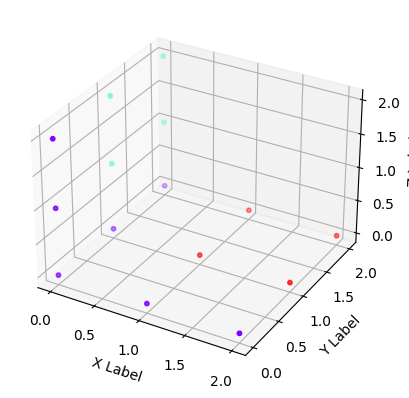

In [6]:
import matplotlib.pyplot as plt

points = pattern[:,:3].T

fig = plt.figure()
ax = fig.add_subplot(projection='3d')


ax.scatter(points[0], points[1], points[2], s=10, c=color, cmap='rainbow')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [7]:
# projection
from utils.camera import Camera

K = np.eye(3)
Rt = np.hstack((np.eye(3), np.array([[0], [0], [-10]])))
cam = Camera(K, Rt)


In [8]:
points = pattern[:,:3].T
points4 = np.vstack((points, np.ones(points.shape[1])))
proj = cam.project(points4)

In [19]:
(Rt @ points4).T

array([[  0.,   0., -10.],
       [  0.,   1., -10.],
       [  0.,   2., -10.],
       [  0.,   0.,  -9.],
       [  0.,   1.,  -9.],
       [  0.,   2.,  -9.],
       [  0.,   0.,  -8.],
       [  0.,   1.,  -8.],
       [  0.,   2.,  -8.],
       [  1.,   0., -10.],
       [  1.,   1., -10.],
       [  1.,   2., -10.],
       [  2.,   0., -10.],
       [  2.,   1., -10.],
       [  2.,   2., -10.]])

In [27]:
(Rt @ points4).T
# proj = cam.project(()

array([[  0.,   0., -10.],
       [  0.,   1., -10.],
       [  0.,   2., -10.],
       [  0.,   0.,  -9.],
       [  0.,   1.,  -9.],
       [  0.,   2.,  -9.],
       [  0.,   0.,  -8.],
       [  0.,   1.,  -8.],
       [  0.,   2.,  -8.],
       [  1.,   0., -10.],
       [  1.,   1., -10.],
       [  1.,   2., -10.],
       [  2.,   0., -10.],
       [  2.,   1., -10.],
       [  2.,   2., -10.]])

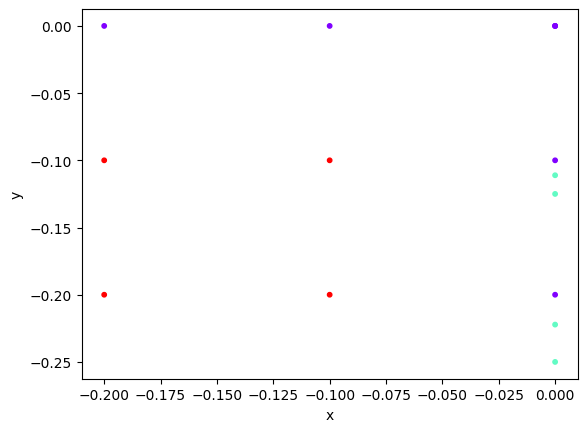

In [9]:
plt.scatter(proj[0], proj[1], s=10, c=color, cmap='rainbow')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# проекция выполняется честно в плоскость изображения, но плоскость изображения находится не там, где кажется на первый взгляд...

In [10]:
proj[:2,:].T

array([[-0.        , -0.        ],
       [-0.        , -0.1       ],
       [-0.        , -0.2       ],
       [-0.        , -0.        ],
       [-0.        , -0.11111111],
       [-0.        , -0.22222222],
       [-0.        , -0.        ],
       [-0.        , -0.125     ],
       [-0.        , -0.25      ],
       [-0.1       , -0.        ],
       [-0.1       , -0.1       ],
       [-0.1       , -0.2       ],
       [-0.2       , -0.        ],
       [-0.2       , -0.1       ],
       [-0.2       , -0.2       ]])

In [11]:
cam.P

array([[  1.,   0.,   0.,   0.],
       [  0.,   1.,   0.,   0.],
       [  0.,   0.,   1., -10.]])

In [15]:
cam2 = Camera.from_look_at(cam_position=np.array([0,0,10]), up=np.array([1,0,0]))

In [16]:
cam2.P

array([[ 0.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 0.,  0., -1., 10.]])

[[0.         0.1        0.2        0.         0.11111111 0.22222222
  0.         0.125      0.25       0.         0.1        0.2
  0.         0.1        0.2       ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.1        0.1        0.1
  0.2        0.2        0.2       ]
 [1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.        ]]


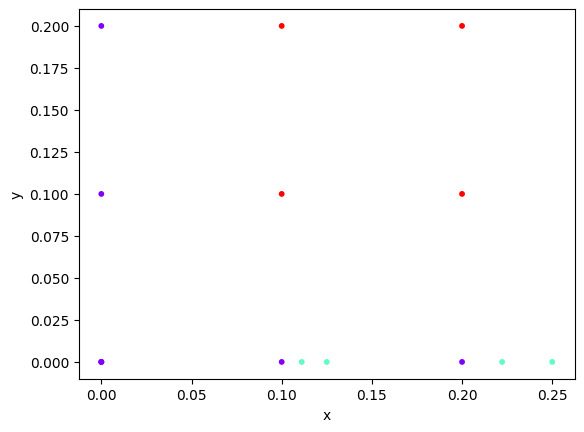

In [17]:
proj = cam2.project(points4)
print(proj)

plt.scatter(proj[0], proj[1], s=10, c=color, cmap='rainbow')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [10]:
from utils.estimator import estimate_projection_matrix
np.set_printoptions(precision=4, suppress=True)

M = estimate_projection_matrix(points4.T, proj.T)
print(M)

[[-0.0986 -0.     -0.      0.    ]
 [ 0.     -0.0986 -0.      0.    ]
 [-0.      0.     -0.0986  0.9862]]


In [30]:
A = M[:,:3]
sgn = -1 # origin in front of camera
a1 = A[0,:]
a2 = A[1,:]
a3 = A[2,:]

rho = sgn / np.linalg.norm(a3)
print(rho)
r3 = rho * A[2,:]
print(r3)
x0 = rho * rho * np.dot(a1, a3)
print(x0)
y0 = rho * rho * np.dot(a2, a3)
print(y0)

-10.141521966440685
[ 0.0001 -0.      1.    ]
0.00014567005628108828
-1.6964749321736254e-05


In [32]:
cos_phi = -np.dot(np.cross(a1, a3), np.cross(a2, a3)) /\
    (np.linalg.norm(np.cross(a1, a3)) * np.linalg.norm(np.cross(a2, a3)))
print(cos_phi)
phi = np.arccos(cos_phi)
alpha = rho * rho * np.linalg.norm(np.cross(a1, a3)) * np.sin(phi)
print(alpha)
beta = rho * rho * np.linalg.norm(np.cross(a2, a3)) * np.sin(phi)
print(beta)

8.020520537243074e-07
1.0001145802230111
1.000120365326481


In [35]:
r1 = np.cross(a2, a3) / np.linalg.norm(np.cross(a2, a3))
print(r1)
r2 = np.cross(r3, r1)
print(r2)

[ 1.      0.     -0.0001]
[-0.  1.  0.]


In [36]:
K = np.array([[alpha, -alpha * np.cos(phi) / np.sin(phi), x0],
              [0, beta / np.sin(phi), y0],
              [0, 0, 1]])
K

array([[ 1.0001, -0.    ,  0.0001],
       [ 0.    ,  1.0001, -0.    ],
       [ 0.    ,  0.    ,  1.    ]])

In [37]:
b = M[:,3]
t = rho * np.linalg.inv(K) @ b
t

array([  0.0014,  -0.0002, -10.0011])

In [14]:
cam3 = Camera.from_look_at(cam_position=np.array([0, 0, 2]),                           
                           up=np.array([0, 1, 0]))

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[ 0]
 [ 0]
 [-2]]


In [12]:
cam3.P

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1., -2.]])

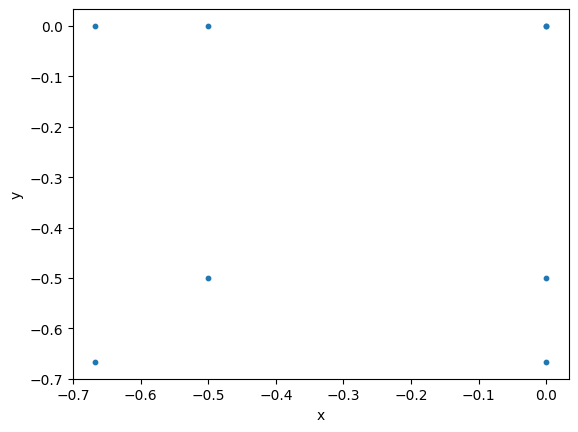

In [13]:
proj = cam3.project(points4)

plt.scatter(proj[0], proj[1], s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()